In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [119]:
dt=pd.read_csv('sms_data.csv',encoding='ISO-8859-1')

In [120]:
dt.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [121]:
dt.drop(["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [122]:
dt.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
le=LabelEncoder()
dt.v1=le.fit_transform(dt.v1)

In [124]:
dt.sample(4)

,v1,v2
475,0,Ok I'm gonna head up to usf in like fifteen mi...
4068,0,Hope youåÕre not having too much fun without m...
2339,0,Cheers for the message Zogtorius. IåÕve been s...
1591,0,That's my honeymoon outfit. :)


In [125]:
dt.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [126]:
dt

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [127]:
dt.isnull().sum()

target    0
text      0
dtype: int64

In [128]:
dt.duplicated().sum()

403

In [129]:
dt.drop_duplicates(keep='first',inplace=True)

In [130]:
dt.shape

(5169, 2)

## EDA

In [131]:
dt.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x206d731f080>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'sapm')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

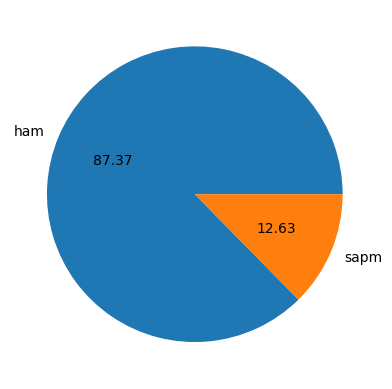

In [132]:
plt.pie(dt.target.value_counts(),labels=['ham','sapm'],autopct='%0.2f')

<Axes: xlabel='target', ylabel='count'>

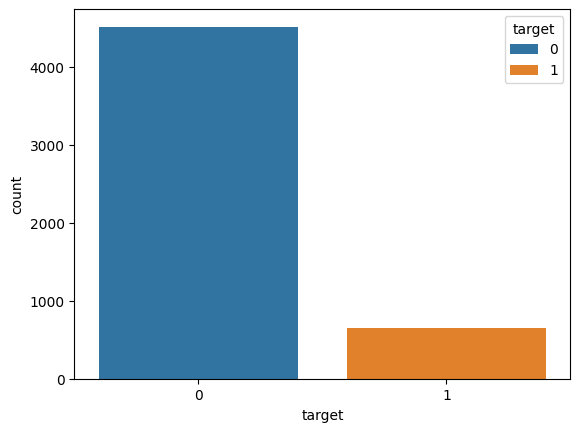

In [133]:
sns.countplot(x='target',data=dt,hue='target')

In [134]:
from nltk import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

In [135]:
tokenizer=TreebankWordTokenizer()

In [136]:
#No. of characters in each text row
dt['n_char']=dt.text.apply(len)

In [137]:
#no. words in each text row
dt['n_words']=dt.text.apply(lambda x:len(tokenizer.tokenize(x)))
#no. of sentences in the text row
#dt['n_sent']=dt.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [138]:
dt[dt['target']==0][['n_char','n_words']].describe()

,n_char,n_words
count,4516.000000,4516.000000
mean,70.459256,16.452613
std,56.358207,12.858450
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,21.000000
max,910.000000,214.000000


In [139]:
dt[dt['target']==1][['n_char','n_words']].describe()

,n_char,n_words
count,653.000000,653.000000
mean,137.891271,26.289433
std,30.137753,6.579189
min,13.000000,2.000000
25%,132.000000,24.000000
50%,149.000000,28.000000
75%,157.000000,30.000000
max,224.000000,41.000000


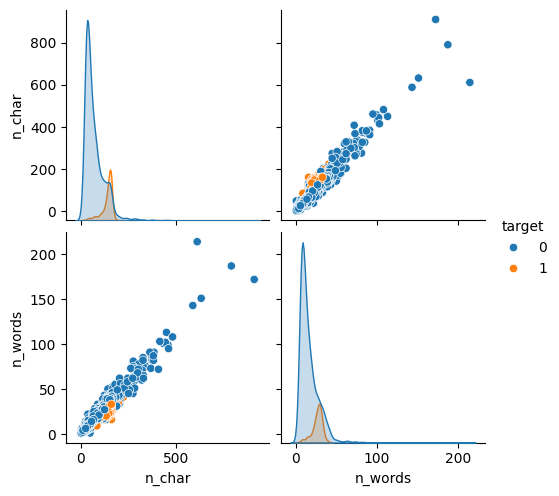

In [140]:
sns.pairplot(dt,hue='target')

In [141]:
#gettiing the co-relation between the words&character
x=dt[['n_char','n_words','target']].corr()

<Axes: >

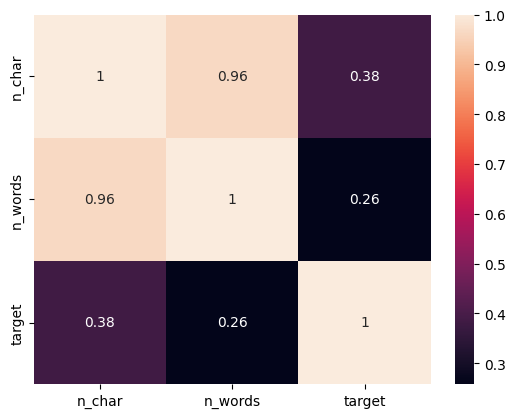

In [142]:
sns.heatmap(x,annot=True)

## Data Preprocessing
    ## .Lowering text
    ## .tokenizing
    ## .removing special char.
    ## .removing punctuations and stopwords
    ## .stemming

In [143]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import nltk
stm=PorterStemmer()

In [177]:
x="0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"
stopwords=' '.join(x)

tuple

In [145]:
#creating a function that will do data processing
def transform_sms(text):
    text=text.lower() #lowering
    text=tokenizer.tokenize(text) #tokenizing
    # removing special char
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    # removing punctuations
    x=[]
    for i in text:
        if  i not in string.punctuation and i not in stopwords:
            x.append(i)
    text=x[:]
    x.clear()
    y.clear()
    for i in text:
        y.append(stm.stem(i))
    return " ".join(y)
    

In [146]:
dt.text=dt['text'].apply(lambda x:transform_sms(x))

In [147]:
dt.head()

,target,text,n_char,n_words
0,0,jurong point bugi great buffet cine amor wat,111,23
1,0,joke wif oni,29,8
2,1,free entri wkli comp cup final tkt 21st text 8...,155,36
3,0,dun,49,13
4,0,nah usf live,61,15


In [148]:
from collections import Counter

In [149]:
#finding top 30 words with highest no. of appearence in both ham and spam
ham=[]
for msg in dt[dt.target==0]['text'].tolist():
    for word in msg.split():
        ham.append(word)
spam=[]
for msg in dt[dt.target==1].text.tolist():
    for word in msg.split():
        spam.append(word)

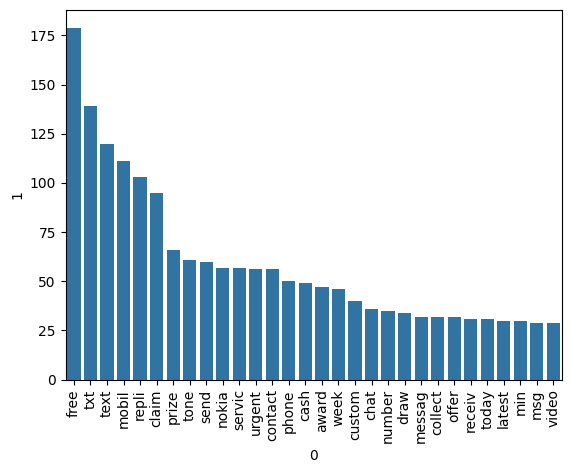

In [150]:
#visualtising top 30 most frequent os spam
sns.barplot(x=pd.DataFrame(Counter(spam).most_common(30))[0],y=pd.DataFrame(Counter(spam).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='0', ylabel='1'>

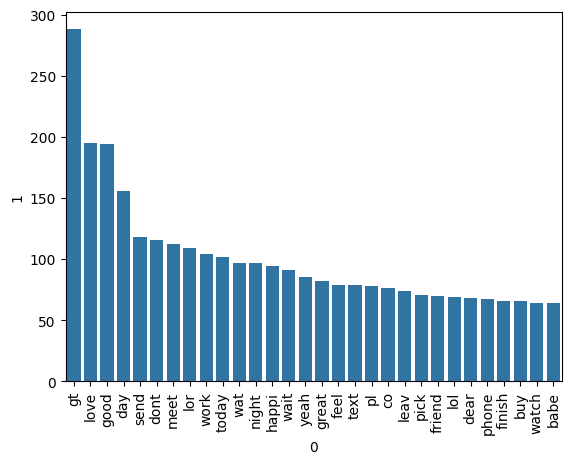

In [151]:
#visualisation of top frequent words in ham
plt.xticks(rotation='vertical')
sns.barplot(x=pd.DataFrame(Counter(ham).most_common(30))[0],y=pd.DataFrame(Counter(ham).most_common(30))[1])

## Model Building

**We have to find a model with priority as 'precison' so that none of the ham message can be considered as spam**

In [152]:
# Vectorising our texual data for model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2950)
cv=CountVectorizer()

In [153]:
x=tfidf.fit_transform(dt.text).toarray()
type(x)

numpy.ndarray

In [154]:
y=dt.target.values
type(y)

numpy.ndarray

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [156]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [157]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [158]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

In [159]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7707930367504836
0.3486238532110092


In [160]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

In [161]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
0.9823008849557522


In [162]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

In [163]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
0.9583333333333334


* We choose Tfidf Vectorizer + MultinomialNB algo. Now checking with other algos to get best model..*

In [164]:
#importing different algorithms..
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [165]:
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=6)
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
knn=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=48,random_state=2)
bc=BaggingClassifier(n_estimators=48,random_state=2)
etc=ExtraTreesClassifier(n_estimators=49,random_state=2)
abc=AdaBoostClassifier(n_estimators=49,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [166]:
dict={
    'mnb':mnb,
    'dtc':dtc,
    'gbc':gbc,
    'lr':lr,
    'rfc':rfc,
    'etc':etc,
    'svc':svc,
    'knn':knn,
    'abc':abc,
    'bc':bc
}

In [167]:
def pred_model(model_name,x_train,x_test,y_train,y_test):
    model_name.fit(x_train,y_train)
    pred=model_name.predict(x_test)
    return accuracy_score(y_test,pred),precision_score(y_test,pred)


In [168]:
accuracy_scores=[]
precision_scores=[]
for name,model_name in dict.items():
    curr_acc,curr_prec=pred_model(model_name,x_train,x_test,y_train,y_test)
    print(name)
    print('\t')
    print(curr_acc)
    print('\t')
    print(curr_prec)
    print('\t')
    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)

mnb
	
0.971953578336557
	
0.9823008849557522
	
dtc
	
0.9352030947775629
	
0.8736842105263158
	
gbc
	
0.9458413926499033
	
0.9456521739130435
	
lr
	
0.9545454545454546
	
0.9174311926605505
	
rfc
	
0.9700193423597679
	
0.9734513274336283
	
etc
	
0.9738878143133463
	
0.9586776859504132
	
svc
	
0.9661508704061895
	
0.9186991869918699
	
knn
	
0.9032882011605415
	
0.975
	
abc
	
0.9574468085106383
	
0.8983050847457628
	
bc
	
0.9622823984526112
	
0.896
	


In [169]:
# creating dataframe so that we can visualize all model models based on their accuracy and precision
model_df=pd.DataFrame({"Algo":dict.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [170]:
model_df

,Algo,Accuracy,Precision
0,mnb,0.971954,0.982301
7,knn,0.903288,0.975000
4,rfc,0.970019,0.973451
5,etc,0.973888,0.958678
2,gbc,0.945841,0.945652
6,svc,0.966151,0.918699
3,lr,0.954545,0.917431
8,abc,0.957447,0.898305
9,bc,0.962282,0.896000
1,dtc,0.935203,0.873684


In [171]:
import pickle

In [173]:
pickle.dump(mnb,open('mnb.pkl','wb'))

In [176]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))